In [10]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

EDS_files = ['cora_sampling_method=EDS_OfficialK_sparsity=100_results.p',
'cora_sampling_method=EDS_OfficialK_sparsity=10_results.p',
'cora_sampling_method=EDS_OfficialK_sparsity=5_results.p']

Greedy_files = [
'cora_sampling_method=Greedy_OfficialK_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=100_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=100_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=10_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=10_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=5_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_OfficialK_sparsity=5_label_balance=Greedy_noise=1_results.p']

max_files = ['cora_sampling_method=MaxDegree_Officialmaxdegree_results.p']




In [15]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content
            
eds_results = open_files(EDS_files)
geedy_results = open_files(Greedy_files)
max_results = open_files(max_files)


{'time': '2019-01-23 14:06:12', 'params': {'params': {'dataset': 'cora', 'epochs': 3, 'learning_rate': 0.01, 'hidden1': 16, 'weight_decay': 0.0005, 'dropout': 0, 'early_stopping': 50}, 'seed': 13}, 'K_sparsity': 100}


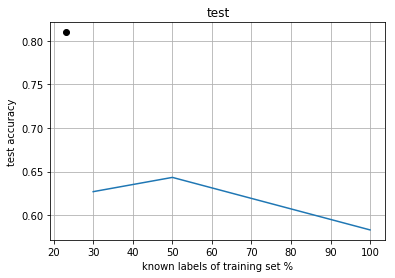

In [21]:
def results_to_lines(results):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
        lines.append((x,y,result['info']))
    return lines

def plot(title, save_file,lines):
    for line in lines:
        plt.plot(line[0],line[1])
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")

plot("test","test",results_to_lines(max_results))

[{'results': [('gcn', 29.966887417218544, 0.58937443047761917, 0.032851621541449674), ('gcn', 50.0, 0.58699943870306015, 0.02221480362428643), ('gcn', 100.0, 0.58299940824508667, 0.0)], 'info': {'time': '2019-01-23 14:06:12', 'params': {'params': {'dataset': 'cora', 'epochs': 3, 'learning_rate': 0.01, 'hidden1': 16, 'weight_decay': 0.0005, 'dropout': 0, 'early_stopping': 50}, 'seed': 13}, 'K_sparsity': 100}}, {'results': [('gcn', 29.966887417218544, 0.58874943852424622, 0.020902997432548018), ('gcn', 50.0, 0.5849994421005249, 0.01422140843629194), ('gcn', 100.0, 0.58299940824508667, 0.0)], 'info': {'time': '2019-01-23 14:06:04', 'params': {'params': {'dataset': 'cora', 'epochs': 3, 'learning_rate': 0.01, 'hidden1': 16, 'weight_decay': 0.0005, 'dropout': 0, 'early_stopping': 50}, 'seed': 13}, 'K_sparsity': 10}}, {'results': [('gcn', 29.966887417218544, 0.60462439805269241, 0.032668450291368535), ('gcn', 50.0, 0.60312439501285553, 0.016495684188522819), ('gcn', 100.0, 0.58299940824508667

In [6]:



def get_split_data(data,prefix_keys=''):
    data_plot_dict = {}
    for tup in data:
        print(tup)
        if prefix_keys + tup[0] in data_plot_dict:
            data_plot_dict[prefix_keys + tup[0]]['x'].append(tup[1])
            data_plot_dict[prefix_keys + tup[0]]['y'].append(tup[2])
        else:
            data_plot_dict[prefix_keys + tup[0]] = {'x':[tup[1]], 'y':[tup[2]]}
        
    return data_plot_dict

blue_patch = mpatches.Patch(color='blue', label='gcnn')
red_patch = mpatches.Patch(color='red', label='sampled gcnn')
yellow_patch = mpatches.Patch(color='yellow', label='dense nn')
cyan_patch = mpatches.Patch(color='cyan', label='k-nn')
green_patch = mpatches.Patch(color='green', label='sampled gcnn Idenity')
black_patch = mpatches.Patch(color='black', label='gcnn Identity')

plot_dict_display = {'dense':('y',yellow_patch),
                     'gcn':('b',blue_patch),
                     'gcn_subsampled':('r',red_patch),
                     'I_gcn':('k',black_patch),
                     'I_gcn_subsampled':('g',green_patch),
                     'k-nn':('c',cyan_patch)}


def plot_test(title, save_file,data_plot_dict, line_display_option='-'):
    handles = []
    for model_to_plot in data_plot_dict.keys():
        plt.plot(data_plot_dict[model_to_plot]['x'], data_plot_dict[model_to_plot]['y'], plot_dict_display[model_to_plot][0]+line_display_option)
        handles.append(plot_dict_display[model_to_plot][1])
    plt.legend(handles=handles,loc=4)
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    


[('gcn_subsampled', 0, 0.13), ('gcn_subsampled', 1, 0.35999998), ('gcn_subsampled', 4, 0.57499951), ('gcn_subsampled', 8, 0.61799937), ('gcn_subsampled', 17, 0.69399911), ('gcn_subsampled', 22, 0.71599907), ('gcn_subsampled', 33, 0.739999), ('gcn_subsampled', 100, 0.8149991), ('gcn', 0, 0.13), ('gcn', 1, 0.38299993), ('gcn', 4, 0.59499943), ('gcn', 8, 0.6419993), ('gcn', 17, 0.71099907), ('gcn', 22, 0.72199905), ('gcn', 33, 0.74099904), ('gcn', 100, 0.8149991)]
('gcn_subsampled', 0, 0.13)
('gcn_subsampled', 1, 0.35999998)
('gcn_subsampled', 4, 0.57499951)
('gcn_subsampled', 8, 0.61799937)
('gcn_subsampled', 17, 0.69399911)
('gcn_subsampled', 22, 0.71599907)
('gcn_subsampled', 33, 0.739999)
('gcn_subsampled', 100, 0.8149991)
('gcn', 0, 0.13)
('gcn', 1, 0.38299993)
('gcn', 4, 0.59499943)
('gcn', 8, 0.6419993)
('gcn', 17, 0.71099907)
('gcn', 22, 0.72199905)
('gcn', 33, 0.74099904)
('gcn', 100, 0.8149991)
{'I_gcn': {'y': [0.13, 0.38299993, 0.59499943, 0.6419993, 0.71099907, 0.72199905, 0.7

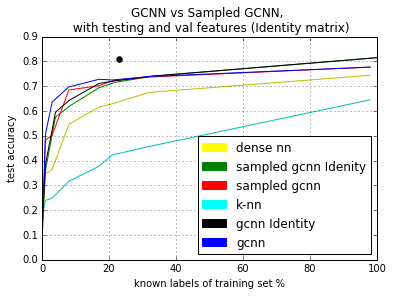

In [9]:
print(I_results)
dict_plot = get_split_data(I_results, prefix_keys='I_')
print(dict_plot)
dict_plot.update(get_split_data(results))
plot_test('GCNN vs Sampled GCNN, \n with testing and val features (Identity matrix)','GCNNvs_with_test_Identity.png',dict_plot)


{'I_gcn': {'x': [0, 1, 4, 6, 9, 14, 19, 29, 39, 50, 75, 100], 'y': [0.063999996, 0.51199967, 0.53399956, 0.59699941, 0.63499933, 0.70599914, 0.71199906, 0.73199916, 0.7459991, 0.76699907, 0.78399903, 0.80799907]}, 'I_gcn_subsampled': {'x': [0, 1, 4, 6, 9, 14, 19, 29, 39, 50, 75, 100], 'y': [0.131, 0.25400001, 0.38799995, 0.46699977, 0.44099984, 0.54199958, 0.58599943, 0.62699932, 0.66799921, 0.73499906, 0.771999, 0.80799907]}}


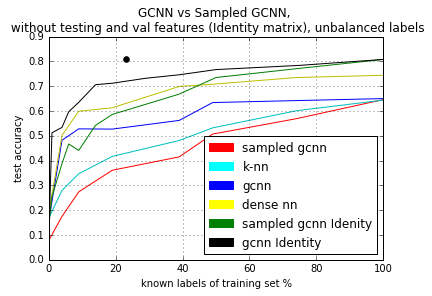

In [5]:

dict_plot = get_split_data(I_results_wo_test_random, prefix_keys='I_')
print(dict_plot)
dict_plot.update(get_split_data(results_wo_test_random))
plot_test('GCNN vs Sampled GCNN, \n without testing and val features (Identity matrix), unbalanced labels', 'GCNNvs_without_test_Identity.png',dict_plot)

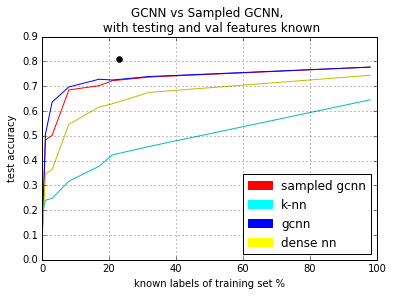

In [6]:
 
plot_test('GCNN vs Sampled GCNN, \n with testing and val features known', 'GCNNvs_with_test.png',get_split_data(results))

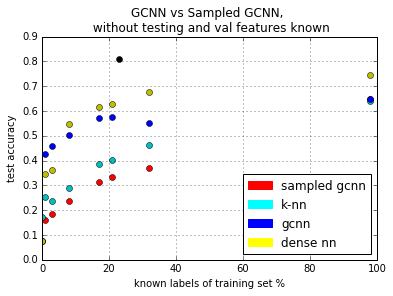

In [7]:

plot_test('GCNN vs Sampled GCNN, \n without testing and val features known', 'GCNNvs_without_test.png',get_split_data(results_wo_test),'o')


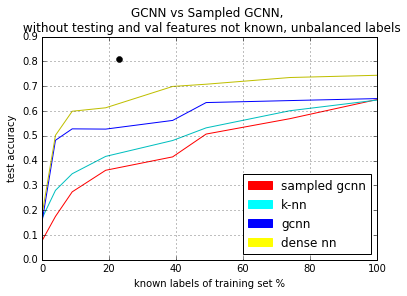

In [8]:

plot_test('GCNN vs Sampled GCNN, \n without testing and val features not known, unbalanced labels', 'GCNNvs_without_test_random.png',get_split_data(results_wo_test_random))


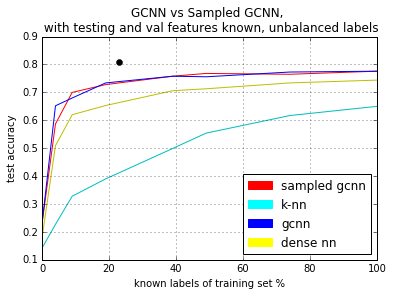

In [9]:

plot_test('GCNN vs Sampled GCNN, \n with testing and val features known, unbalanced labels', 'GCNNvs_with_random.png',get_split_data(results_random))


In [14]:
def test(a : int, b : int -> int):
    return 3

SyntaxError: invalid syntax (<ipython-input-14-fd56d0320512>, line 1)